<a href="https://colab.research.google.com/github/SidharthBhasin0068/DataCleaning/blob/main/correlation_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
#import libraries
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

#reading the dataset
df = pd.read_csv('/content/drive/MyDrive/moviesk2.csv')

In [9]:
new_df = df.dropna()

In [4]:
new_df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country      budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000.0   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000.0   
2           Leigh Brackett     Mark Hamill   United States  18000000.0   
3             Jim Abrahams     Robert Hays   United States   3500000.0   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000.0   

         gross             company  runtime  
0   46998772.0        Warner Bros.    146.0  
1   58853106.0   Columbia Pictures    104.0  
2  538375067.0           Lucasfilm    124.0  
3   83453539.0  Paramount Pictures     88.0  
4   39846344.0      Orion Pictures     98.0

In [10]:
#lets see we have missing values or not
for col in new_df.columns:
    pct_missing = np.mean(new_df[col].isnull())
    print ('{} - {}%'.format(col,pct_missing))

name - 0.0%
rating - 0.0%
genre - 0.0%
year - 0.0%
released - 0.0%
score - 0.0%
votes - 0.0%
director - 0.0%
writer - 0.0%
star - 0.0%
country - 0.0%
budget - 0.0%
gross - 0.0%
company - 0.0%
runtime - 0.0%


In [12]:
#data types for our columns
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [11]:
#change datatype of columns
new_df['budget'] = new_df['budget'].astype('int64')

new_df['gross'] = new_df['gross'].astype('int64')
new_df['runtime'] = new_df['runtime'].astype('int64')
new_df['score'] = new_df['score'].astype('int64')
new_df['votes'] = new_df['votes'].astype('int64')

<ipython-input-11-1fa37ad6d432>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['budget'] = new_df['budget'].astype('int64')
<ipython-input-11-1fa37ad6d432>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['gross'] = new_df['gross'].astype('int64')
<ipython-input-11-1fa37ad6d432>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/

In [18]:
new_df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget        int64
gross         int64
company      object
runtime     float64
dtype: object

In [10]:
#create correct year column

new_df['yearcorrect'] = new_df['released'].str.extract(r'(\d{4})')

<ipython-input-10-1e62d8f9f6bf>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['yearcorrect'] = new_df['released'].str.extract(r'(\d{4})')


In [12]:
new_df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country      budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000.0   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000.0   
2           Leigh Brackett     Mark Hamill   United States  18000000.0   
3             Jim Abrahams     Robert Hays   United States   3500000.0   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000.0   

         gross             company  runtime yearcorrect  
0   46998772.0        Warner Bros.    146.0        1980  
1   58853106.0   Columbia Pictures    104.0        1980  
2  538375067.0           Lucasfilm    124.0        1980  
3   83453539.0  Paramount Pictures     88.0        1980  
4   39846344.0      Orion Pictures     98.0        1980

In [12]:
new_df = new_df.sort_values(by=['gross'],inplace = False,ascending = False)


In [50]:
new_df

name     rating      genre  year  \
5445  Star Wars: The Force Awakens      PG-13     Action  2009   
7445  Star Wars: The Force Awakens      PG-13     Action  2019   
3045  Star Wars: The Force Awakens      PG-13      Drama  1997   
6663  Star Wars: The Force Awakens      PG-13     Action  2015   
7244  Star Wars: The Force Awakens      PG-13     Action  2018   
7480  Star Wars: The Force Awakens         PG  Animation  2019   
6653  Star Wars: The Force Awakens      PG-13     Action  2015   
6043  Star Wars: The Force Awakens      PG-13     Action  2012   
6646  Star Wars: The Force Awakens      PG-13     Action  2015   
7494  Star Wars: The Force Awakens         PG  Animation  2019   
6644  Star Wars: The Force Awakens      PG-13     Action  2015   
7247  Star Wars: The Force Awakens      PG-13     Action  2018   
5845  Star Wars: The Force Awakens      PG-13  Adventure  2011   
7075  Star Wars: The Force Awakens      PG-13     Action  2017   
7271  Star Wars: The Force Awakens      PG-13     Action  2018   
6262  Star Wars: The Force Awakens         PG  Animation  2013   
7072  Star Wars: The Force Awakens         PG     Family  2017   
7281  Star Wars: The Force Awakens         PG  Animation  2018   
7055  Star Wars: The Force Awakens      PG-13     Action  2017   
6244  Star Wars: The Force Awakens      PG-13     Action  2013   
6688  Star Wars: The Force Awakens         PG  Animation  2015   
6846  Star Wars: The Force Awakens      PG-13     Action  2016   
7250  Star Wars: The Force Awakens      PG-13     Action  2018   
4245  Star Wars: The Force Awakens      PG-13     Action  2003   
7458  Star Wars: The Force Awakens      PG-13     Action  2019   
7456  Star Wars: The Force Awakens      PG-13     Action  2019   
5878  Star Wars: The Force Awakens      PG-13     Action  2011   
6059  Star Wars: The Force Awakens      PG-13     Action  2012   
6494  Star Wars: The Force Awakens      PG-13     Action  2014   
2448  Star Wars: The Force Awakens          G  Animation  1994   
6047  Star Wars: The Force Awakens      PG-13     Action  2012   
7463  Star Wars: The Force Awakens      PG-13     Action  2019   
7450  Star Wars: The Force Awakens          R      Crime  2019   
7488  Star Wars: The Force Awakens          G  Animation  2019   
5685  Star Wars: The Force Awakens          G  Animation  2010   
4852  Star Wars: The Force Awakens      PG-13     Action  2006   
6869  Star Wars: The Force Awakens      PG-13     Action  2016   
7481  Star Wars: The Force Awakens         PG  Adventure  2019   
5860  Star Wars: The Force Awakens      PG-13     Action  2011   
7140  Star Wars: The Force Awakens         PG  Animation  2017   
2245  Star Wars: The Force Awakens      PG-13     Action  1993   
6908  Star Wars: The Force Awakens         PG  Animation  2016   
3451  Star Wars: The Force Awakens         PG     Action  1999   
5667  Star Wars: The Force Awakens         PG  Adventure  2010   
6863  Star Wars: The Force Awakens         PG  Animation  2016   
6045  Star Wars: The Force Awakens      PG-13  Adventure  2012   
3843  Star Wars: The Force Awakens         PG  Adventure  2001   
5243  Star Wars: The Force Awakens      PG-13     Action  2008   
6311  Star Wars: The Force Awakens         PG  Animation  2013   
6905  Star Wars: The Force Awakens         PG  Adventure  2016   
7051  Star Wars: The Force Awakens      PG-13     Action  2017   
6455  Star Wars: The Force Awakens      PG-13  Adventure  2014   
5060  Star Wars: The Force Awakens      PG-13     Action  2007   
6253  Star Wars: The Force Awakens      PG-13  Adventure  2013   
4048  Star Wars: The Force Awakens      PG-13     Action  2002   
5051  Star Wars: The Force Awakens      PG-13     Action  2007   
4259  Star Wars: The Force Awakens          G  Animation  2003   
5451  Star Wars: The Force Awakens         PG     Action  2009   
4476  Star Wars: The Force Awakens         PG  Animation  2004   
7246  Star Wars: The Force Awakens      PG-13  Biography  2018   
3845

In [48]:
pd.set_option('display.max_rows',None)

In [27]:
#drop any duplicates
new_df['company'].drop_duplicates().sort_values(ascending = False)

7129                                              thefyzz
5664                                          micro_scope
4007                                             i5 Films
6793                                           i am OTHER
6420                                                 erbp
3776                                       double A Films
3330                          Zucker Brothers Productions
146                                      Zoetrope Studios
2213                                   Zeta Entertainment
3698                              Zentropa Entertainments
1180                                 Zenith Entertainment
5180                                      Zazen Produções
1321                             Zanuck/Brown Productions
1329                          Zacharias-Buhai Productions
789                             Young Sung Production Co.
5125                           Young Hannibal Productions
5499                                          Yellow Bird
4618                                       Yash Raj Films
4990                            Yari Film Group Releasing
5410                                Yari Film Group (YFG)
5583                                X-Filme Creative Pool
6265                              Worldview Entertainment
4392                          World of Wonder Productions
4999                  World Wrestling Entertainment (WWE)
425                                   World Film Services
4581                                  Working Title Films
4272                                         Wiseau-Films
450                                   Winwood Productions
3943                                        Winkler Films
2084                                        WingNut Films
2355                                 Wildwood Enterprises
6606                                       Wildgaze Films
5276                                           Wild Bunch
4863                      Wiedemann & Berg Filmproduktion
5550                                  Why Not Productions
4572                                     Whitewater Films
6616                               WhiteFlame Productions
1306                                           White Lair
1475                                          White Eagle
1744                                       Westerly Films
1304                        Weintraub Entertainment Group
5496                                Wayfare Entertainment
6672                                        Waverly Films
4505                    Warner Independent Pictures (WIP)
7267                                Warner Bros. Pictures
2284                    Warner Bros. Family Entertainment
6578                    Warner Bros. Digital Distribution
2341                               Warner Bros. Animation
0                                            Warner Bros.
7401                               Warner Animation Group
75                                Walt Disney Productions
688                                  Walt Disney Pictures
117                         Walt Disney Animation Studios
5075                                         Walden Media
4975                                                  WIP
7420                                          Votiv Films
5272                                     Voltage Pictures
5409                                Vivendi Entertainment
1115                                   Vista Organization
6647                                    Visiona Romantica
1307                                           Vision PDG
3539                            Village Roadshow Pictures
2467                               View Askew Productions
1894                        Victor Company of Japan (JVC)
1716                                       Victor & Grais
4964                              Victoires International
1522                                     Vestron Pictures
5302                                        Vertigo Films
6540                                       Verisimilitud

In [ ]:
#budget high correlation
#company high correlation

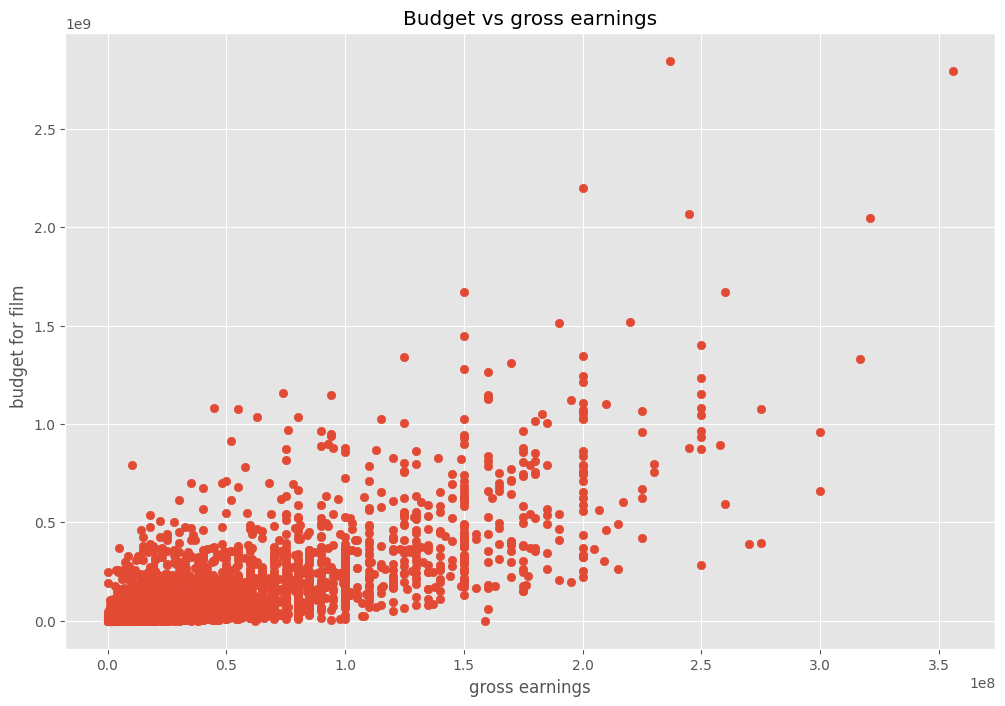

In [33]:
#find the correlation between budget and gross
plt.scatter(x=new_df['budget'], y = new_df['gross'])

plt.title('Budget vs gross earnings')

plt.xlabel('gross earnings')
plt.ylabel('budget for film  ')
plt.show()



In [30]:
new_df.head()

name rating   genre  year  \
5445  Star Wars: The Force Awakens  PG-13  Action  2009   
7445  Star Wars: The Force Awakens  PG-13  Action  2019   
3045  Star Wars: The Force Awakens  PG-13   Drama  1997   
6663  Star Wars: The Force Awakens  PG-13  Action  2015   
7244  Star Wars: The Force Awakens  PG-13  Action  2018   

                               released  score      votes       director  \
5445  December 18, 2009 (United States)    7.8  1100000.0  James Cameron   
7445     April 26, 2019 (United States)    8.4   903000.0  Anthony Russo   
3045  December 19, 1997 (United States)    7.8  1100000.0  James Cameron   
6663  December 18, 2015 (United States)    7.8   876000.0    J.J. Abrams   
7244     April 27, 2018 (United States)    8.4   897000.0  Anthony Russo   

                  writer               star        country     budget  \
5445       James Cameron    Sam Worthington  United States  237000000   
7445  Christopher Markus  Robert Downey Jr.  United States  356000000   
3045       James Cameron  Leonardo DiCaprio  United States  200000000   
6663     Lawrence Kasdan       Daisy Ridley  United States  245000000   
7244  Christopher Markus  Robert Downey Jr.  United States  321000000   

           gross                company  runtime yearcorrect  
5445  2847246203  Twentieth Century Fox    162.0        2009  
7445  2797501328         Marvel Studios    181.0        2019  
3045  2201647264  Twentieth Century Fox    194.0        1997  
6663  2069521700              Lucasfilm    138.0        2015  
7244  2048359754         Marvel Studios    149.0        2018

<Axes: xlabel='budget', ylabel='gross'>

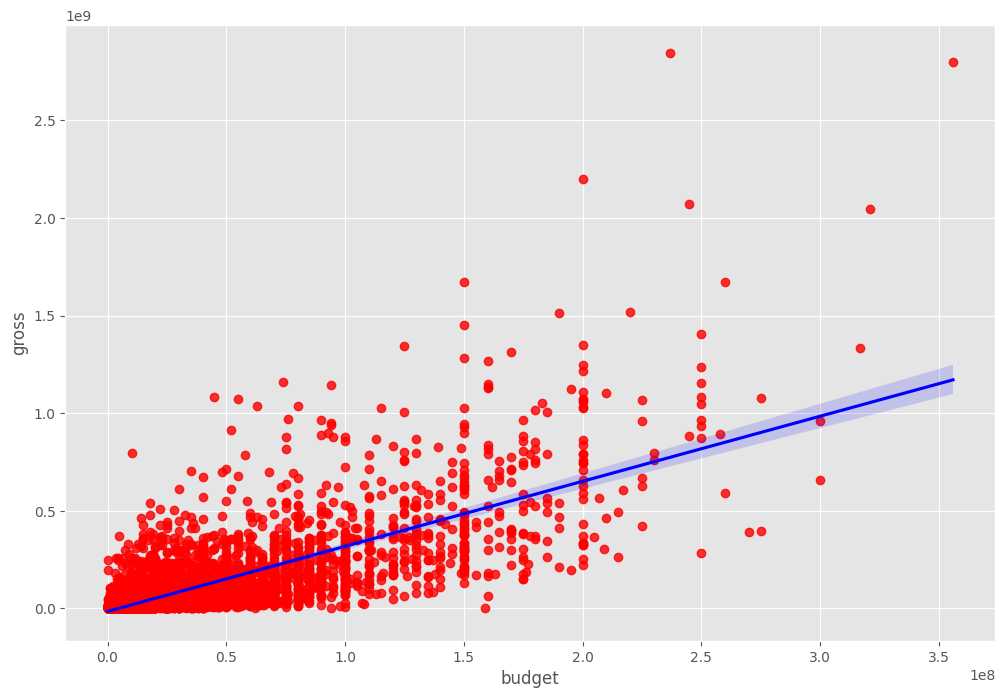

In [35]:
#plot budget vs gross using seaborn
sns.regplot(x= 'budget', y = 'gross',data = new_df,scatter_kws = {"color":"red"},line_kws={"color":"blue"})

In [51]:
#lets start looking at correlation
numeric_df = new_df.select_dtypes(include=[ 'int64'])

In [52]:
numeric_df.corr()

year     score     votes    budget     gross   runtime
year     1.000000  0.057013  0.206021  0.327722  0.274321  0.075077
score    0.057013  1.000000  0.455808  0.066443  0.211973  0.394589
votes    0.206021  0.455808  1.000000  0.439675  0.614751  0.352303
budget   0.327722  0.066443  0.439675  1.000000  0.740247  0.318695
gross    0.274321  0.211973  0.614751  0.740247  1.000000  0.275796
runtime  0.075077  0.394589  0.352303  0.318695  0.275796  1.000000

there are different types of correlation

1. pearson
2. kendall
3. spearman

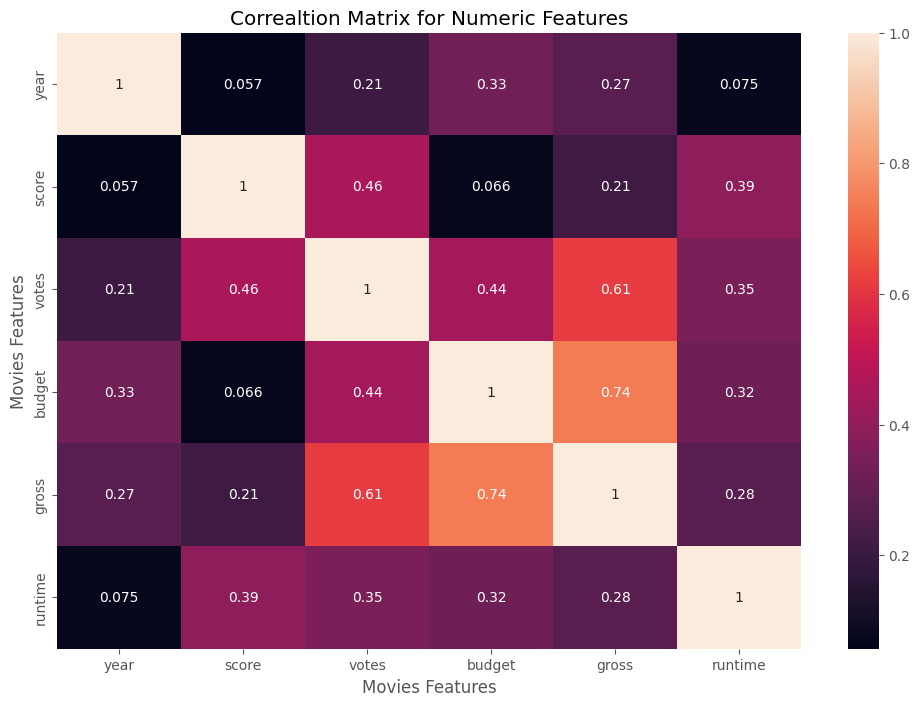

In [58]:
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix,annot= True)
plt.title('Correaltion Matrix for Numeric Features')

plt.xlabel('Movies Features')
plt.ylabel('Movies Features')
plt.show()

In [5]:
df_numerized = new_df
for col_name in df_numerized.columns:
  if(df_numerized[col_name].dtype == 'object'):
    df_numerized[col_name] = df_numerized[col_name].astype('category')
    df_numerized[col_name] = df_numerized[col_name].cat.codes


df_numerized

name  rating  genre  year  released  score      votes  director  writer  \
0     4692       6      6  1980      1304    8.4   927000.0      1795    2832   
1     3929       6      1  1980      1127    5.8    65000.0      1578    1158   
2     3641       4      0  1980      1359    8.7  1200000.0       757    1818   
3      204       4      4  1980      1127    7.7   221000.0       889    1413   
4      732       6      4  1980      1170    7.3   108000.0       719     351   
...    ...     ...    ...   ...       ...    ...        ...       ...     ...   
7648   415       6      0  2020       904    6.6   140000.0        16    2390   
7649  3556       4      0  2020       713    6.5   102000.0       852    2309   
7650  1153       4      1  2020       904    5.6    53000.0      1809    2827   
7651  3978       4      1  2020       758    6.8    42000.0       294    2091   
7652  4090       3      0  2020       370    6.8     3700.0       746    1184   

      star  country       budget        gross  company  runtime  
0      699       46   19000000.0   46998772.0     1426    146.0  
1      214       47    4500000.0   58853106.0      452    104.0  
2     1157       47   18000000.0  538375067.0      945    124.0  
3     1474       47    3500000.0   83453539.0     1108     88.0  
4      271       47    6000000.0   39846344.0     1083     98.0  
...    ...      ...          ...          ...      ...      ...  
7648  1812       47   90000000.0  426505244.0      452    124.0  
7649   147       47   85000000.0  319715683.0     1108     99.0  
7650  1470       47  175000000.0  245487753.0     1397    101.0  
7651   640        6  135000000.0  111105497.0       12    100.0  
7652  1839        8   80000000.0  461421559.0      228    149.0  

[5421 rows x 15 columns]

In [14]:
new_df

name     rating   genre  year  \
5445                                      Avatar      PG-13  Action  2009   
7445                           Avengers: Endgame      PG-13  Action  2019   
3045                                     Titanic      PG-13   Drama  1997   
6663  Star Wars: Episode VII - The Force Awakens      PG-13  Action  2015   
7244                      Avengers: Infinity War      PG-13  Action  2018   
...                                          ...        ...     ...   ...   
5640                                 Tanner Hall          R   Drama  2009   
2434                  Philadelphia Experiment II      PG-13  Action  1993   
3681                                Ginger Snaps  Not Rated   Drama  2000   
272                                     Parasite          R  Horror  1982   
3203                                  Trojan War      PG-13  Comedy  1997   

                               released  score    votes             director  \
5445  December 18, 2009 (United States)      7  1100000        James Cameron   
7445     April 26, 2019 (United States)      8   903000        Anthony Russo   
3045  December 19, 1997 (United States)      7  1100000        James Cameron   
6663  December 18, 2015 (United States)      7   876000          J.J. Abrams   
7244     April 27, 2018 (United States)      8   897000        Anthony Russo   
...                                 ...    ...      ...                  ...   
5640          January 15, 2015 (Sweden)      5     3500  Francesca Gregorini   
2434         June 4, 1994 (South Korea)      4     1900     Stephen Cornwell   
3681              May 11, 2001 (Canada)      6    43000         John Fawcett   
272      March 12, 1982 (United States)      3     2300         Charles Band   
3203           October 1, 1997 (Brazil)      5     5800         George Huang   

                       writer               star        country     budget  \
5445            James Cameron    Sam Worthington  United States  237000000   
7445       Christopher Markus  Robert Downey Jr.  United States  356000000   
3045            James Cameron  Leonardo DiCaprio  United States  200000000   
6663          Lawrence Kasdan       Daisy Ridley  United States  245000000   
7244       Christopher Markus  Robert Downey Jr.  United States  321000000   
...                       ...                ...            ...        ...   
5640  Tatiana von Fürstenberg        Rooney Mara  United States    3000000   
2434       Wallace C. Bennett       Brad Johnson  United States    5000000   
3681             Karen Walton      Emily Perkins         Canada    5000000   
272             Alan J. Adler    Robert Glaudini  United States     800000   
3203                Andy Burg       Will Friedle  United States   15000000   

           gross                    company  runtime  
5445  2847246203      Twentieth Century Fox      162  
7445  2797501328             Marvel Studios      181  
3045  2201647264      Twentieth Century Fox      194  
6663  2069521700                  Lucasfilm      138  
7244  2048359754             Marvel Studios      149  
...          ...                        ...      ...  
5640        5073           Two Prong Lesson       96  
2434        2970           Trimark Pictures       97  
3681        2554  Copperheart Entertainment      108  
272         2270           Embassy Pictures       85  
3203         309                   Daybreak       85  

[5421 rows x 15 columns]

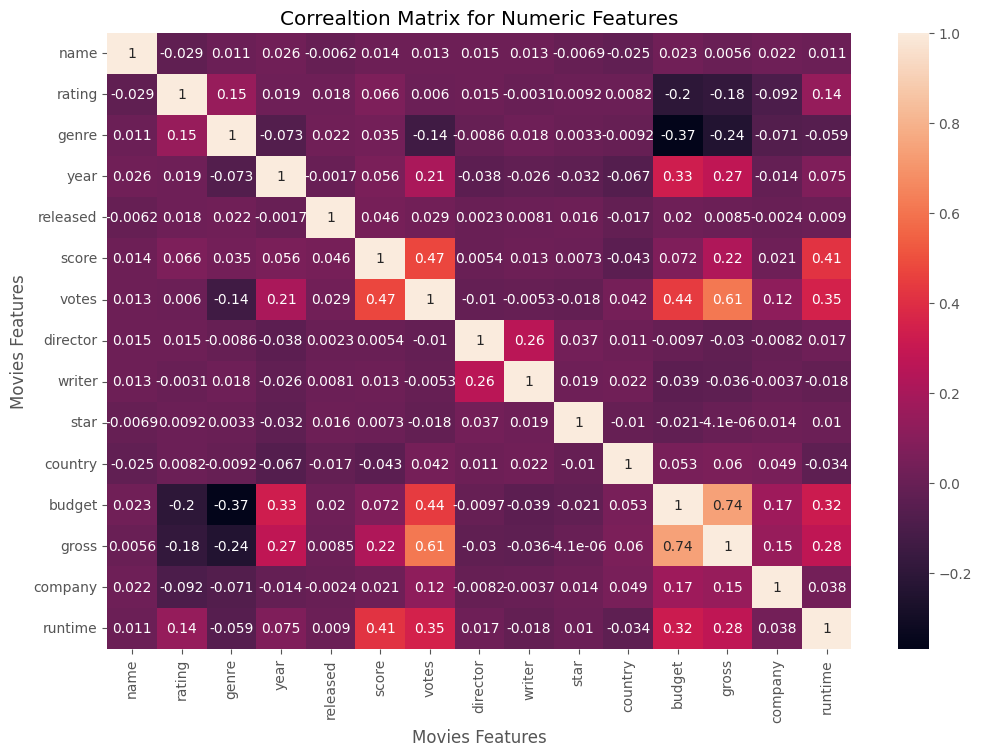

In [15]:
correlation_matrix = df_numerized.corr()
sns.heatmap(correlation_matrix,annot= True)
plt.title('Correaltion Matrix for Numeric Features')

plt.xlabel('Movies Features')
plt.ylabel('Movies Features')
plt.show()

In [18]:
pd.set_option('display.max_rows',None)

In [19]:
correlation_mat = df_numerized.corr()
corr_pairs = correlation_mat.unstack()
corr_pairs

name      name        1.000000
          rating     -0.029234
          genre       0.010996
          year        0.025542
          released   -0.006152
          score       0.014450
          votes       0.012615
          director    0.015246
          writer      0.012880
          star       -0.006882
          country    -0.025490
          budget      0.023392
          gross       0.005639
          company     0.021697
          runtime     0.010850
rating    name       -0.029234
          rating      1.000000
          genre       0.147796
          year        0.019499
          released    0.018083
          score       0.065983
          votes       0.006031
          director    0.014656
          writer     -0.003149
          star        0.009196
          country     0.008230
          budget     -0.203946
          gross      -0.181906
          company    -0.092357
          runtime     0.140792
genre     name        0.010996
          rating      0.147796
          genre       1.000000
          year       -0.073167
          released    0.022142
          score       0.035106
          votes      -0.135990
          director   -0.008553
          writer      0.017578
          star        0.003341
          country    -0.009164
          budget     -0.368523
          gross      -0.244101
          company    -0.071334
          runtime    -0.059237
year      name        0.025542
          rating      0.019499
          genre      -0.073167
          year        1.000000
          released   -0.001740
          score       0.056386
          votes       0.206021
          director   -0.038354
          writer     -0.025908
          star       -0.032157
          country    -0.066748
          budget      0.327722
          gross       0.274321
          company    -0.014333
          runtime     0.075077
released  name       -0.006152
          rating      0.018083
          genre       0.022142
          year       -0.001740
          released    1.000000
          score       0.045874
          votes       0.028833
          director    0.002308
          writer      0.008072
          star        0.015706
          country    -0.017228
          budget      0.019952
          gross       0.008501
          company    -0.002407
          runtime     0.008975
score     name        0.014450
          rating      0.065983
          genre       0.035106
          year        0.056386
          released    0.045874
          score       1.000000
          votes       0.474256
          director    0.005413
          writer      0.012843
          star        0.007296
          country    -0.043051
          budget      0.072001
          gross       0.222556
          company     0.020656
          runtime     0.414068
votes     name        0.012615
          rating      0.006031
          genre      -0.135990
          year        0.206021
          released    0.028833
          score       0.474256
          votes       1.000000
          director   -0.010376
          writer     -0.005316
          star       -0.017638
          country     0.041551
          budget      0.439675
          gross       0.614751
          company     0.118470
          runtime     0.352303
director  name        0.015246
          rating      0.014656
          genre      -0.008553
          year       -0.038354
          released    0.002308
          score       0.005413
          votes      -0.010376
          director    1.000000
          writer      0.261735
          star        0.036593
          country     0.011133
          budget     -0.009662
          gross      -0.029560
          company    -0.008223
          runtime     0.017433
writer    name        0.012880
          rating     -0.003149
          genre       0.017578
          year       -0.025908
          released    0.008072
          score       0.012843
          votes      -0.005316
          director    0.261735
          writer      1.000000
 

In [20]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

budget    genre      -0.368523
genre     budget     -0.368523
          gross      -0.244101
gross     genre      -0.244101
budget    rating     -0.203946
rating    budget     -0.203946
          gross      -0.181906
gross     rating     -0.181906
genre     votes      -0.135990
votes     genre      -0.135990
company   rating     -0.092357
rating    company    -0.092357
genre     year       -0.073167
year      genre      -0.073167
genre     company    -0.071334
company   genre      -0.071334
year      country    -0.066748
country   year       -0.066748
genre     runtime    -0.059237
runtime   genre      -0.059237
country   score      -0.043051
score     country    -0.043051
budget    writer     -0.039466
writer    budget     -0.039466
director  year       -0.038354
year      director   -0.038354
writer    gross      -0.035885
gross     writer     -0.035885
country   runtime    -0.034477
runtime   country    -0.034477
star      year       -0.032157
year      star       -0.032157
director  gross      -0.029560
gross     director   -0.029560
name      rating     -0.029234
rating    name       -0.029234
year      writer     -0.025908
writer    year       -0.025908
country   name       -0.025490
name      country    -0.025490
budget    star       -0.021473
star      budget     -0.021473
votes     star       -0.017638
star      votes      -0.017638
writer    runtime    -0.017561
runtime   writer     -0.017561
country   released   -0.017228
released  country    -0.017228
company   year       -0.014333
year      company    -0.014333
director  votes      -0.010376
votes     director   -0.010376
country   star       -0.009990
star      country    -0.009990
budget    director   -0.009662
director  budget     -0.009662
country   genre      -0.009164
genre     country    -0.009164
          director   -0.008553
director  genre      -0.008553
          company    -0.008223
company   director   -0.008223
star      name       -0.006882
name      star       -0.006882
released  name       -0.006152
name      released   -0.006152
votes     writer     -0.005316
writer    votes      -0.005316
          company    -0.003697
company   writer     -0.003697
writer    rating     -0.003149
rating    writer     -0.003149
company   released   -0.002407
released  company    -0.002407
          year       -0.001740
year      released   -0.001740
gross     star       -0.000004
star      gross      -0.000004
director  released    0.002308
released  director    0.002308
star      genre       0.003341
genre     star        0.003341
score     director    0.005413
director  score       0.005413
name      gross       0.005639
gross     name        0.005639
rating    votes       0.006031
votes     rating      0.006031
score     star        0.007296
star      score       0.007296
released  writer      0.008072
writer    released    0.008072
rating    country     0.008230
country   rating      0.008230
gross     released    0.008501
released  gross       0.008501
          runtime     0.008975
runtime   released    0.008975
star      rating      0.009196
rating    star        0.009196
star      runtime     0.010108
runtime   star        0.010108
          name        0.010850
name      runtime     0.010850
          genre       0.010996
genre     name        0.010996
director  country     0.011133
country   director    0.011133
name      votes       0.012615
votes     name        0.012615
score     writer      0.012843
writer    score       0.012843
name      writer      0.012880
writer    name        0.012880
company   star        0.014082
star      company     0.014082
score     name        0.014450
name      score       0.014450
director  rating      0.014656
rating    director    0.014656
director  name        0.015246
name      director    0.015246
released  star        0.015706
star      released    0.015706
director  runtime     0.017433
runtime   director    0.017433
genre     writer      0.017578
writer    genre       0.017578
released  rating      0.018083
r

In [21]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]
high_corr

votes     gross       0.614751
gross     votes       0.614751
          budget      0.740247
budget    gross       0.740247
name      name        1.000000
director  director    1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
writer    writer      1.000000
votes     votes       1.000000
score     score       1.000000
released  released    1.000000
year      year        1.000000
genre     genre       1.000000
rating    rating      1.000000
company   company     1.000000
runtime   runtime     1.000000
dtype: float64